In [1]:
# Import relevant modules
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import numpy
import numpy.random as rand
import seaborn as sns
import numpy as np
import sklearn
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Print out the first 5 values of the dataset
df = pd.read_csv("top10s.csv", encoding='ISO-8859-1') 
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2]:
# Find out the shape of the dataset
print(df.shape)

(603, 15)


In [3]:
# Find out more information about the dataset
print(df.describe())

       Unnamed: 0         year         bpm        nrgy        dnce  \
count  603.000000   603.000000  603.000000  603.000000  603.000000   
mean   302.000000  2014.592040  118.545605   70.504146   64.379768   
std    174.215384     2.607057   24.795358   16.310664   13.378718   
min      1.000000  2010.000000    0.000000    0.000000    0.000000   
25%    151.500000  2013.000000  100.000000   61.000000   57.000000   
50%    302.000000  2015.000000  120.000000   74.000000   66.000000   
75%    452.500000  2017.000000  129.000000   82.000000   73.000000   
max    603.000000  2019.000000  206.000000   98.000000   97.000000   

               dB        live         val         dur       acous        spch  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   
std      2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   
min    -60.000000    0.000000    0.000000  13

## <font color= grey> Data Cleaning

In [4]:
# Replace all " " values with Not a Number
df = df.replace(" ", np.nan)

In [5]:
# Find out how much missing values there are in the dataset
df.isnull().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [6]:
# Dropping all missing values just in case there were any missed out
df=df.dropna(axis = 0, how='any')
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [7]:
# Notice how it seems that the dataset has no missing values
df.shape

(603, 15)

In [8]:
# Find out how many duplicated values are there in the dataset
duplicated = df.duplicated().sum()
duplicated

0

In [9]:
# Find out what are the columns in the dataset
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [10]:
# Drop the column "Index" and reset the index of the dataset
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [11]:
# Identifying the upper and lower limits
upper_limit_pop = df['pop'].quantile(0.99)
lower_limit_pop = df['pop'].quantile(0.01)
upper_limit_pop, lower_limit_pop

(91.96000000000004, 18.0)

In [12]:
# Trim the upper and lower limit data
df = df[(df['pop'] <= upper_limit_pop) & (df['pop'] >= lower_limit_pop)]

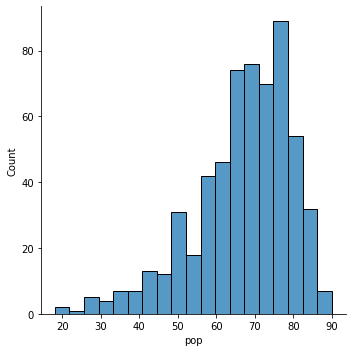

In [13]:
# Plot the new distribution plot for pop column
sns.displot(df['pop'])

In [14]:
# Identifying the upper and lower limits
upper_limit_dB = df['dB'].quantile(0.99)
lower_limit_dB = df['dB'].quantile(0.01)
upper_limit_dB, lower_limit_dB

(-3.0, -11.0)

In [15]:
# Trim the upper and lower limit data
df = df[(df['dB'] <= upper_limit_dB) & (df['dB'] >= lower_limit_dB)]

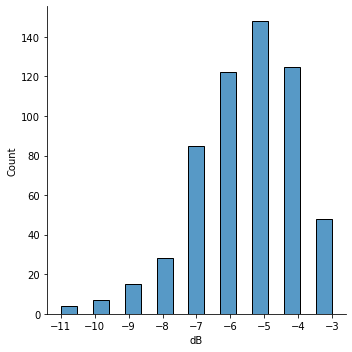

In [16]:
# Plot the new distribution plot for dB column
sns.displot(df['dB'])

In [17]:
# Identifying the upper and lower limits
upper_limit_bpm = df['bpm'].quantile(0.99)
lower_limit_bpm = df['bpm'].quantile(0.01)
upper_limit_bpm, lower_limit_bpm

(190.0, 75.81)

In [18]:
# Trim the upper and lower limit data
df = df[(df['bpm'] <= upper_limit_bpm) & (df['bpm'] >= lower_limit_bpm)]

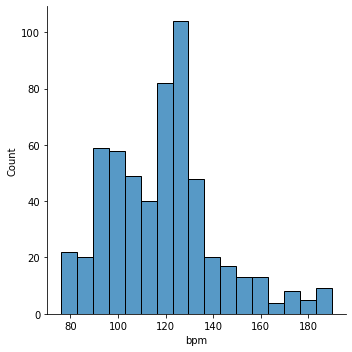

In [19]:
# Plot the new distribution plot for bpm column
sns.displot(df['bpm'])

In [20]:
# Identifying the upper and lower limits
upper_limit_nrgy = df['nrgy'].quantile(0.99)
lower_limit_nrgy = df['nrgy'].quantile(0.01)
upper_limit_nrgy, lower_limit_nrgy

(95.0, 28.0)

In [21]:
# Trim the upper and lower limit data
df = df[(df['nrgy'] <= upper_limit_nrgy) & (df['nrgy'] >= lower_limit_nrgy)]

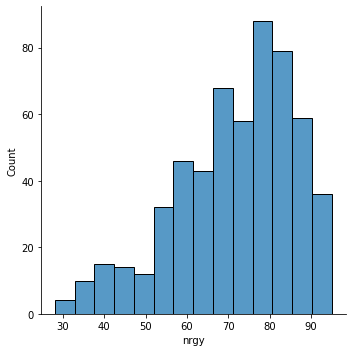

In [22]:
# Plot the new distribution plot for nrgy column
sns.displot(df['nrgy'])

In [23]:
# Identifying the upper and lower limits
upper_limit_dnce = df['dnce'].quantile(0.99)
lower_limit_dnce = df['dnce'].quantile(0.01)
upper_limit_dnce, lower_limit_dnce

(93.0, 28.0)

In [24]:
# Trim the upper and lower limit data
df = df[(df['dnce'] <= upper_limit_dnce) & (df['dnce'] >= lower_limit_dnce)]

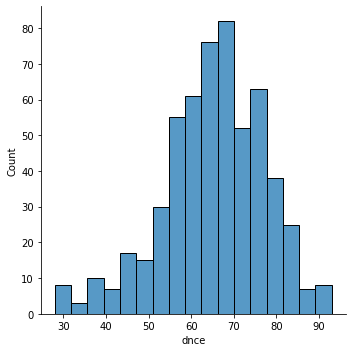

In [25]:
# Plot the new distribution plot for dnce column
sns.displot(df['dnce'])

## <font color= grey> Data Transormation

In [26]:
# Generalise the genres into 9 different categories
for genre in df['top genre']:
    if 'pop' in genre :
        df['top genre'] = df['top genre'].replace(genre, 'pop')
    elif 'hip hop' in genre :
        df['top genre'] = df['top genre'].replace(genre, 'hip hop')
    elif 'rap' in genre :
        df['top genre'] = df['top genre'].replace(genre, 'hip hop')
    elif 'edm' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'edm')
    elif 'r&b' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'pop')
    elif 'latin' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'latin')
    elif 'room' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'room')
    elif 'electro' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'edm')
    elif 'complextro' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'edm')
    elif 'house' in genre:
        df['top genre'] = df['top genre'].replace(genre, 'house')
    else:
        df['top genre'] = df['top genre'].replace(genre, 'others')

In [27]:
# Print out first 5 values of dataset
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,others,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [28]:
# One hot encode the top genre column
df = pd.get_dummies(df,columns=["top genre"])

In [29]:
# Find out the datatypes of the data in dataset
df.dtypes

title                object
artist               object
year                  int64
bpm                   int64
nrgy                  int64
dnce                  int64
dB                    int64
live                  int64
val                   int64
dur                   int64
acous                 int64
spch                  int64
pop                   int64
top genre_edm         uint8
top genre_hip hop     uint8
top genre_house       uint8
top genre_latin       uint8
top genre_others      uint8
top genre_pop         uint8
top genre_room        uint8
dtype: object

In [30]:
# Convert the duration into minutes by dividing the seconds by 60 to get the duration in minutes
df['dur'] = df['dur'].div(60)
df.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
0,"Hey, Soul Sister",Train,2010,97,89,67,-4,8,80,3.616667,19,4,83,0,0,0,0,1,0,0
1,Love The Way You Lie,Eminem,2010,87,93,75,-5,52,64,4.383333,24,23,82,0,1,0,0,0,0,0
2,TiK ToK,Kesha,2010,120,84,76,-3,29,71,3.333333,10,14,80,0,0,0,0,0,1,0
3,Bad Romance,Lady Gaga,2010,119,92,70,-4,8,71,4.916667,0,4,79,0,0,0,0,0,1,0
4,Just the Way You Are,Bruno Mars,2010,109,84,64,-5,9,43,3.683333,2,4,78,0,0,0,0,0,1,0


In [31]:
# Round up duration to 2 decimal places
df['dur'] = df['dur'].round(decimals = 2)

In [32]:
# Check to see if we have transformed Duration (ms) properly
df['dur']

0      3.62
1      4.38
2      3.33
3      4.92
4      3.68
       ... 
598    2.93
599    3.43
600    4.33
601    3.62
602    3.55
Name: dur, Length: 557, dtype: float64

In [33]:
df.columns

Index(['title', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val',
       'dur', 'acous', 'spch', 'pop', 'top genre_edm', 'top genre_hip hop',
       'top genre_house', 'top genre_latin', 'top genre_others',
       'top genre_pop', 'top genre_room'],
      dtype='object')

In [34]:
# Rename columns respectively to provide more clarity to them 
df.rename(columns = {'year':'release year',
                    'nrgy':'energy',
                    'dnce':'danceability',
                    'dB':'decibles',
                    'live':'liveness',
                    'val':'valence',
                    'dur':'duration',
                    'acous':'acoustic',
                    'spch':'speechiness',
                    'pop':'popularity'
                            }, inplace=True)

In [35]:
df.head()

,title,artist,release year,bpm,energy,danceability,decibles,liveness,valence,duration,acoustic,speechiness,popularity,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
0,"Hey, Soul Sister",Train,2010,97,89,67,-4,8,80,3.62,19,4,83,0,0,0,0,1,0,0
1,Love The Way You Lie,Eminem,2010,87,93,75,-5,52,64,4.38,24,23,82,0,1,0,0,0,0,0
2,TiK ToK,Kesha,2010,120,84,76,-3,29,71,3.33,10,14,80,0,0,0,0,0,1,0
3,Bad Romance,Lady Gaga,2010,119,92,70,-4,8,71,4.92,0,4,79,0,0,0,0,0,1,0
4,Just the Way You Are,Bruno Mars,2010,109,84,64,-5,9,43,3.68,2,4,78,0,0,0,0,0,1,0


In [36]:
# Check to see if columns have been renamed properly
df.columns

Index(['title', 'artist', 'release year', 'bpm', 'energy', 'danceability',
       'decibles', 'liveness', 'valence', 'duration', 'acoustic',
       'speechiness', 'popularity', 'top genre_edm', 'top genre_hip hop',
       'top genre_house', 'top genre_latin', 'top genre_others',
       'top genre_pop', 'top genre_room'],
      dtype='object')

In [37]:
# Bin the bpm into 5 categotical values
# Find the min and max of bpm
min_value_bpm = df['bpm'].min()
max_value_bpm = df['bpm'].max()
# Bin values equally into 5 bins between the min and max of bpm
bpm_bins = np.linspace(min_value_bpm,max_value_bpm,6)
bpm_labels = ['very slow', 'slow', 'average', 'fast', 'very fast']
df['bpm'] = pd.cut(df['bpm'], bins=bpm_bins, labels=bpm_labels, include_lowest=True)

<AxesSubplot:>

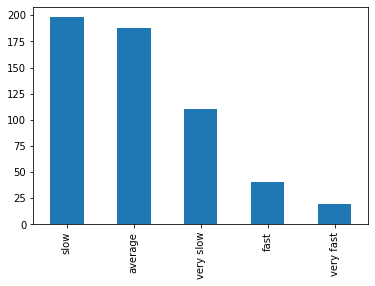

In [38]:
# Check if the values have been binned properly using a bar chart
df['bpm'].value_counts().plot(kind='bar')

In [39]:
# Check if the values have been binned properly
df['bpm'].value_counts()

slow         198
average      188
very slow    110
fast          41
very fast     20
Name: bpm, dtype: int64

In [40]:
# Bin energy into 5 categorical values
# Find the min and max of energy
min_value_energy = df['energy'].min()
max_value_energy = df['energy'].max()
# Bin values equally into 5 bins between the min and max of energy
energy_bins = np.linspace(min_value_energy,max_value_energy,6)
energy_labels = ['very unenergetic', 'unenergetic', 'average', 'energetic', 'very energetic']
df['energy'] = pd.cut(df['energy'], bins=energy_bins, labels=energy_labels, include_lowest=True)

<AxesSubplot:>

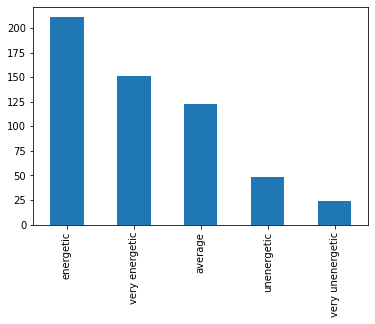

In [41]:
# Check if the values have been binned properly using a bar chart
df['energy'].value_counts().plot(kind='bar')

In [42]:
# Check if the values have been binned properly
df['energy'].value_counts()

energetic           211
very energetic      151
average             123
unenergetic          48
very unenergetic     24
Name: energy, dtype: int64

In [43]:
# Bin danceability into 5 categorical values
# Find the min and max of danceability
min_value_danceability = df['danceability'].min()
max_value_danceability = df['danceability'].max()
# Bin values equally into 5 bins between the min and max of danceability
danceability_bins = np.linspace(min_value_danceability,max_value_danceability,6)
danceability_labels = ['very undanceable', 'undanceable', 'average', 'danceable', 'very danceable']
df['danceability'] = pd.cut(df['danceability'], bins=danceability_bins, labels=danceability_labels, include_lowest=True)

<AxesSubplot:>

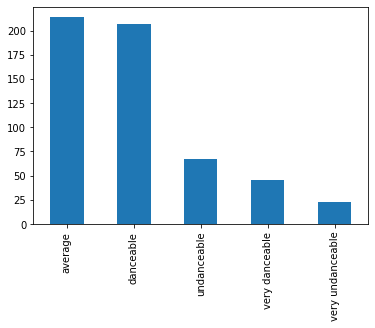

In [44]:
# Check if the values have been binned properly using a bar chart
df['danceability'].value_counts().plot(kind='bar')

In [45]:
# Check if the values have been binned properly
df['danceability'].value_counts()

average             214
danceable           207
undanceable          67
very danceable       46
very undanceable     23
Name: danceability, dtype: int64

In [46]:
# Bin decibles into 5 categorical values
# Find the min and max of decibles
min_value_decibles = df['decibles'].min()
max_value_decibles = df['decibles'].max()
# Bin values equally into 5 bins between the min and max of decibles
decibles_bins = np.linspace(min_value_decibles,max_value_decibles,6)
decibles_labels = ['very quiet', 'quiet', 'average', 'loud', 'very loud']
df['decibles'] = pd.cut(df['decibles'], bins=decibles_bins, labels=decibles_labels, include_lowest=True)

<AxesSubplot:>

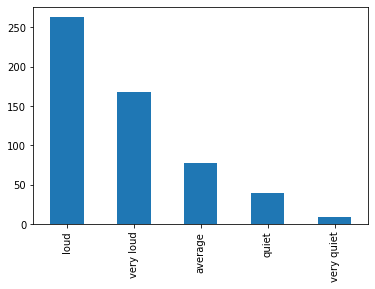

In [47]:
# Check if the values have been binned properly using a bar chart
df['decibles'].value_counts().plot(kind='bar')

In [48]:
# Check if the values have been binned properly
df['decibles'].value_counts()

loud          263
very loud     168
average        78
quiet          39
very quiet      9
Name: decibles, dtype: int64

In [49]:
# Bin valence into 5 categorical values
# Find the min and max of valence
min_value_valence = df['valence'].min()
max_value_valence = df['valence'].max()
# Bin values equally into 5 bins between the min and max of valence
valence_bins = np.linspace(min_value_valence,max_value_valence,6)
valence_labels = ['very negative', 'negative', 'average', 'positive', 'very positive']
df['valence'] = pd.cut(df['valence'], bins=valence_bins, labels=valence_labels, include_lowest=True)

<AxesSubplot:>

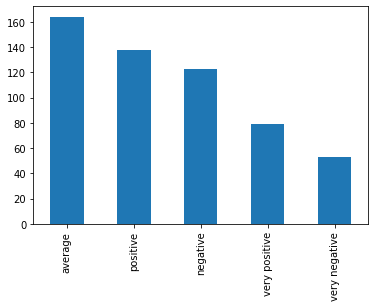

In [50]:
# Check if the values have been binned properly using a bar chart
df['valence'].value_counts().plot(kind='bar')

In [51]:
# Check if the values have been binned properly
df['valence'].value_counts()

average          164
positive         138
negative         123
very positive     79
very negative     53
Name: valence, dtype: int64

In [52]:
# Bin duration into 5 categorical values
# Find the min and max of duration
min_value_duration = df['duration'].min()
max_value_duration = df['duration'].max()
# Bin values equally into 5 bins between the min and max of duration
duration_bins = np.linspace(min_value_duration,max_value_duration,6)
duration_labels = ['very slow', 'slow', 'average', 'fast', 'very fast']
df['duration'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels, include_lowest=True)

<AxesSubplot:>

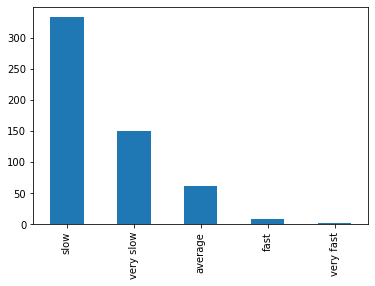

In [53]:
# Check if the values have been binned properly using a bar chart
df['duration'].value_counts().plot(kind='bar')

In [54]:
# Check if the values have been binned properly
df['duration'].value_counts()

slow         333
very slow    150
average       62
fast           9
very fast      3
Name: duration, dtype: int64

In [55]:
# Bin acoustic into 5 categorical values
# Find the min and max of acoustic
min_value_acoustic = df['acoustic'].min()
max_value_acoustic = df['acoustic'].max()
# Bin values equally into 5 bins between the min and max of acoustic
acoustic_bins = np.linspace(min_value_acoustic,max_value_acoustic,6)
acoustic_labels = ['very little acoustic', 'a little acoustic', 'average', 'acoustic', 'very acoustic']
df['acoustic'] = pd.cut(df['acoustic'], bins=acoustic_bins, labels=acoustic_labels, include_lowest=True)

<AxesSubplot:>

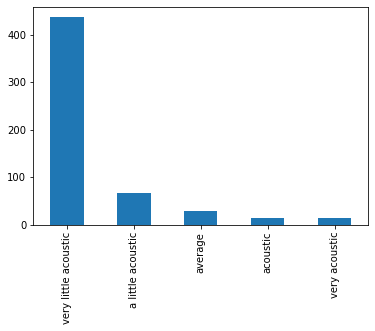

In [56]:
# Check if the values have been binned properly using a bar chart
df['acoustic'].value_counts().plot(kind='bar')

In [57]:
# Check if the values have been binned properly
df['acoustic'].value_counts()

very little acoustic    437
a little acoustic        66
average                  28
acoustic                 13
very acoustic            13
Name: acoustic, dtype: int64

In [58]:
# Bin speechiness into 5 categorical values
# Find the min and max of speechiness
min_value_speechiness = df['speechiness'].min()
max_value_speechiness = df['speechiness'].max()
# Bin values equally into 5 bins between the min and max of speechiness
speechiness_bins = np.linspace(min_value_speechiness,max_value_speechiness,6)
speechiness_labels = ['very little speech', 'a little speech', 'average', 'speechy', 'very speechy']
df['speechiness'] = pd.cut(df['speechiness'], bins=speechiness_bins, labels=speechiness_labels, include_lowest=True)

<AxesSubplot:>

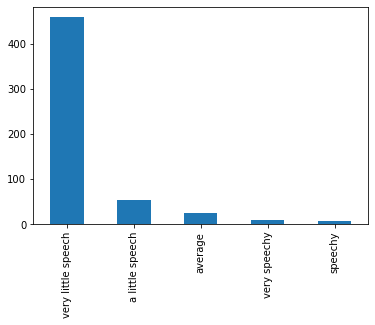

In [59]:
# Check if the values have been binned properly using a bar chart
df['speechiness'].value_counts().plot(kind='bar')

In [60]:
# Check if the values have been binned properly
df['speechiness'].value_counts()

very little speech    458
a little speech        55
average                26
very speechy           10
speechy                 8
Name: speechiness, dtype: int64

In [61]:
# Bin liveness into 5 categorical values
# Find the min and max of liveness
min_value_liveness = df['liveness'].min()
max_value_liveness = df['liveness'].max()
# Bin values equally into 5 bins between the min and max of liveness
liveness_bins = np.linspace(min_value_liveness,max_value_liveness,6)
liveness_labels = ['very prerecorded', 'prerecorded', 'mixed', 'live', 'very live']
df['liveness'] = pd.cut(df['liveness'], bins=liveness_bins, labels=liveness_labels, include_lowest=True)

<AxesSubplot:>

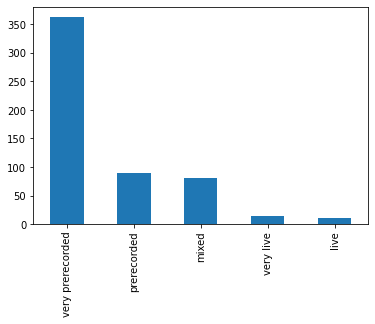

In [62]:
# Check if the values have been binned properly using a bar chart
df['liveness'].value_counts().plot(kind='bar')

In [63]:
# Bin popularity into 5 categorical values
# Find the min and max of popularity
min_value_popularity = df['popularity'].min()
max_value_popularity = df['popularity'].max()
# Bin values equally into 5 bins between the min and max of popularity
popularity_bins = np.linspace(min_value_popularity,max_value_popularity,6)
popularity_labels = ['very low popularity', 'low popularity', 'average popularity', 'high popularity', 'very high popularity']
df['popularity'] = pd.cut(df['popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)

<AxesSubplot:>

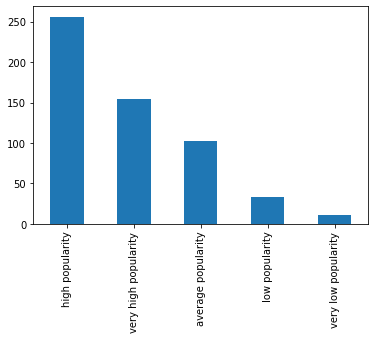

In [64]:
# Check if the values have been binned properly using a bar chart
df['popularity'].value_counts().plot(kind='bar')

In [65]:
df.dtypes

title                  object
artist                 object
release year            int64
bpm                  category
energy               category
danceability         category
decibles             category
liveness             category
valence              category
duration             category
acoustic             category
speechiness          category
popularity           category
top genre_edm           uint8
top genre_hip hop       uint8
top genre_house         uint8
top genre_latin         uint8
top genre_others        uint8
top genre_pop           uint8
top genre_room          uint8
dtype: object

Below is code that helps to ordinally encode the categorical columns in the dataset

In [66]:
encoded_bpm = {"bpm": {"very slow": 1, "slow": 2,"average":3,"fast":4,"very fast":5}}
df.replace(encoded_bpm, inplace=True)

In [67]:
encoded_energy = {"energy": {"very unenergetic": 1, "unenergetic": 2,"average":3,"energetic":4,"very energetic":5}}
df.replace(encoded_energy, inplace=True)

In [68]:
encoded_danceability = {"danceability": {"very undanceable": 1, "undanceable": 2,"average":3,"danceable":4,"very danceable":5}}
df.replace(encoded_danceability, inplace=True)

In [69]:
encoded_decibles = {"decibles": {"very quiet": 1, "quiet": 2,"average":3,"loud":4,"very loud":5}}
df.replace(encoded_decibles, inplace=True)

In [70]:
encoded_liveness = {"liveness": {"very prerecorded": 1, "prerecorded": 2,"mixed":3,"live":4,"very live":5}}
df.replace(encoded_liveness, inplace=True)

In [71]:
encoded_valence = {"valence": {"very negative": 1, "negative": 2,"average":3,"positive":4,"very positive":5}}
df.replace(encoded_valence, inplace=True)

In [72]:
encoded_duration = {"duration": {"very slow": 1, "slow": 2,"average":3,"fast":4,"very fast":5}}
df.replace(encoded_duration, inplace=True)

In [73]:
encoded_acoustic = {"acoustic": {"very little acoustic": 1, "a little acoustic": 2,"average":3,"acoustic":4,"very acoustic":5}}
df.replace(encoded_acoustic, inplace=True)

In [74]:
encoded_speechiness = {"speechiness": {"very little speech": 1, "a little speech": 2,"average":3,"speechy":4,"very speechy":5}}
df.replace(encoded_speechiness, inplace=True)

In [75]:
encoded_popularity = {"popularity": {"very low popularity": 1, "low popularity": 2,"average popularity":3,"high popularity":4,"very high popularity":5}}
df.replace(encoded_popularity, inplace=True)

In [76]:
df.dtypes

title                object
artist               object
release year          int64
bpm                   int64
energy                int64
danceability          int64
decibles              int64
liveness              int64
valence               int64
duration              int64
acoustic              int64
speechiness           int64
popularity            int64
top genre_edm         uint8
top genre_hip hop     uint8
top genre_house       uint8
top genre_latin       uint8
top genre_others      uint8
top genre_pop         uint8
top genre_room        uint8
dtype: object

In [77]:
df.head()

,title,artist,release year,bpm,energy,danceability,decibles,liveness,valence,duration,acoustic,speechiness,popularity,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
0,"Hey, Soul Sister",Train,2010,1,5,3,5,1,5,2,2,1,5,0,0,0,0,1,0,0
1,Love The Way You Lie,Eminem,2010,1,5,4,4,4,4,3,2,3,5,0,1,0,0,0,0,0
2,TiK ToK,Kesha,2010,2,5,4,5,2,4,1,1,2,5,0,0,0,0,0,1,0
3,Bad Romance,Lady Gaga,2010,2,5,4,5,1,4,3,1,1,5,0,0,0,0,0,1,0
4,Just the Way You Are,Bruno Mars,2010,2,5,3,4,1,3,2,1,1,5,0,0,0,0,0,1,0


In [78]:
# Rename columns respectively to provide more clarity to them 
df.rename(columns = {"bpm":"speed",
                    "decibles":"loudness",
                    "duration":"length",
                     "acoustic":"acousticness",
                            }, inplace=True)

In [79]:
# Convert the categorical data into numerical data
df['speed'] = pd.factorize(df['speed'],sort=True)[0] + 1
df['energy'] = pd.factorize(df['energy'],sort=True)[0] + 1
df['danceability'] = pd.factorize(df['danceability'],sort=True)[0] + 1
df['loudness'] = pd.factorize(df['loudness'],sort=True)[0] + 1
df['liveness'] = pd.factorize(df['liveness'],sort=True)[0] + 1
df['valence'] = pd.factorize(df['valence'],sort=True)[0] + 1
df['length'] = pd.factorize(df['length'],sort=True)[0] + 1
df['acousticness'] = pd.factorize(df['acousticness'],sort=True)[0] + 1
df['speechiness'] = pd.factorize(df['speechiness'],sort=True)[0] + 1
df['popularity'] = pd.factorize(df['popularity'],sort=True)[0] + 1

In [80]:
df.dtypes

title                object
artist               object
release year          int64
speed                 int64
energy                int64
danceability          int64
loudness              int64
liveness              int64
valence               int64
length                int64
acousticness          int64
speechiness           int64
popularity            int64
top genre_edm         uint8
top genre_hip hop     uint8
top genre_house       uint8
top genre_latin       uint8
top genre_others      uint8
top genre_pop         uint8
top genre_room        uint8
dtype: object

In [81]:
df.head()

,title,artist,release year,speed,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
0,"Hey, Soul Sister",Train,2010,1,5,3,5,1,5,2,2,1,5,0,0,0,0,1,0,0
1,Love The Way You Lie,Eminem,2010,1,5,4,4,4,4,3,2,3,5,0,1,0,0,0,0,0
2,TiK ToK,Kesha,2010,2,5,4,5,2,4,1,1,2,5,0,0,0,0,0,1,0
3,Bad Romance,Lady Gaga,2010,2,5,4,5,1,4,3,1,1,5,0,0,0,0,0,1,0
4,Just the Way You Are,Bruno Mars,2010,2,5,3,4,1,3,2,1,1,5,0,0,0,0,0,1,0


In [82]:
df['popularity'].value_counts()

4    256
5    155
3    102
2     33
1     11
Name: popularity, dtype: int64

## <font color= grey> Correlation Analysis

In [83]:
# Drop title and artist as we want to evaluate the relation between musical factors/characteristics and popularity, and 
# title and artist do not have relation to the characteristics of music. (using domain knowledge)
df.drop(['title','artist'], axis=1, inplace=True)

In [84]:
df.shape

(557, 18)

In [85]:
# Plot correlation matrix for the correlation of columns in dataset
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='Reds')

,release year,speed,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
release year,1.000000,-0.142216,-0.205963,0.077221,-0.153812,-0.123272,-0.108342,-0.175608,0.075372,0.001637,0.205194,0.094404,-0.035738,0.013811,0.096392,0.025224,-0.096531,0.074222
speed,-0.142216,1.000000,0.130666,-0.177676,0.044292,0.071177,-0.021967,0.005424,-0.074687,-0.045078,-0.044038,-0.014207,-0.143384,0.030246,0.038613,-0.018305,0.053645,0.041313
energy,-0.205963,0.130666,1.000000,0.019137,0.580326,0.154047,0.320577,-0.149623,-0.431781,0.017055,-0.097496,-0.019734,-0.007042,0.019837,0.022199,-0.077578,0.055439,0.006443
danceability,0.077221,-0.177676,0.019137,1.000000,0.053601,-0.022210,0.438431,-0.162045,-0.128173,-0.091298,0.060408,0.030515,0.037059,-0.098500,0.047395,-0.197288,0.143611,-0.062690
loudness,-0.153812,0.044292,0.580326,0.053601,1.000000,0.047945,0.266824,-0.126839,-0.264420,-0.107366,-0.002563,-0.052761,-0.073356,-0.043224,0.002754,-0.019734,0.073175,0.018438
liveness,-0.123272,0.071177,0.154047,-0.022210,0.047945,1.000000,0.038529,0.095713,-0.090635,0.097237,-0.098029,-0.085011,0.072768,0.078836,-0.000318,-0.082708,0.041660,0.013524
valence,-0.108342,-0.021967,0.320577,0.438431,0.266824,0.038529,1.000000,-0.263595,-0.156199,0.066967,0.026887,-0.008393,-0.106170,-0.080467,0.070709,-0.096883,0.150600,-0.082249
length,-0.175608,0.005424,-0.149623,-0.162045,-0.126839,0.095713,-0.263595,1.000000,0.119907,0.068775,-0.038945,-0.003837,0.208448,0.013420,-0.012408,-0.000682,-0.072457,-0.056589
acousticness,0.075372,-0.074687,-0.431781,-0.128173,-0.264420,-0.090635,-0.156199,0.119907,1.000000,0.094265,0.038936,-0.013819,0.017985,-0.037385,0.001925,0.142308,-0.092002,-0.012808
speechiness,0.001637,-0.045078,0.017055,-0.091298,-0.107366,0.097237,0.066967,0.068775,0.094265,1.000000,-0.049099,-0.067725,0.144339,-0.006219,-0.013063,-0.074496,0.041168,-0.053247


In [86]:
# Print out columns that have correlation to popularity of the song
cor_target = abs(corr_mat['popularity'])
relevant_features = cor_target[cor_target>0]
relevant_features

release year         0.205194
speed                0.044038
energy               0.097496
danceability         0.060408
loudness             0.002563
liveness             0.098029
valence              0.026887
length               0.038945
acousticness         0.038936
speechiness          0.049099
popularity           1.000000
top genre_edm        0.038289
top genre_hip hop    0.006672
top genre_house      0.030338
top genre_latin      0.073232
top genre_others     0.023202
top genre_pop        0.025442
top genre_room       0.113489
Name: popularity, dtype: float64

<AxesSubplot:>

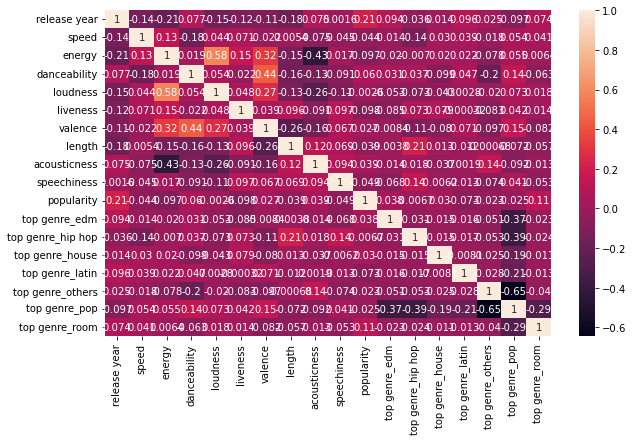

In [87]:
# Plot a heatmap to visualise the correlation better
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot= True)

In [88]:
df.shape

(557, 18)

In [89]:
df.head()

,release year,speed,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room
0,2010,1,5,3,5,1,5,2,2,1,5,0,0,0,0,1,0,0
1,2010,1,5,4,4,4,4,3,2,3,5,0,1,0,0,0,0,0
2,2010,2,5,4,5,2,4,1,1,2,5,0,0,0,0,0,1,0
3,2010,2,5,4,5,1,4,3,1,1,5,0,0,0,0,0,1,0
4,2010,2,5,3,4,1,3,2,1,1,5,0,0,0,0,0,1,0


In [90]:
# Move popularity column to the end of the dataset for better clarity of data
df = df[[i for i in df if i not in ['popularity']] + ['popularity']]

In [91]:
df.head()

,release year,speed,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,top genre_edm,top genre_hip hop,top genre_house,top genre_latin,top genre_others,top genre_pop,top genre_room,popularity
0,2010,1,5,3,5,1,5,2,2,1,0,0,0,0,1,0,0,5
1,2010,1,5,4,4,4,4,3,2,3,0,1,0,0,0,0,0,5
2,2010,2,5,4,5,2,4,1,1,2,0,0,0,0,0,1,0,5
3,2010,2,5,4,5,1,4,3,1,1,0,0,0,0,0,1,0,5
4,2010,2,5,3,4,1,3,2,1,1,0,0,0,0,0,1,0,5


In [92]:
df['popularity']

0      5
1      5
2      5
3      5
4      5
      ..
598    4
599    4
600    4
601    4
602    4
Name: popularity, Length: 557, dtype: int64

## <font color= grey> Data Visualisation

In [93]:
# Print out the top 5 correlated colums in dataset
top_correlated = df.corr().unstack().sort_values(ascending=False).drop_duplicates()[1:6]
top_correlated

loudness           energy          0.580326
valence            danceability    0.438431
energy             valence         0.320577
valence            loudness        0.266824
top genre_hip hop  length          0.208448
dtype: float64

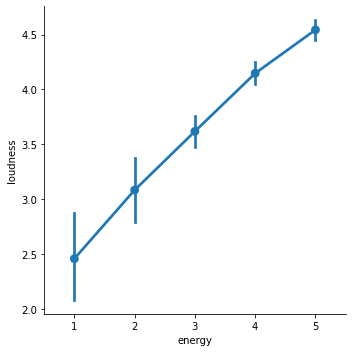

In [94]:
# Plot point plot for energy and loudness
sns.catplot(x="energy", y="loudness", kind="point", data=df)

The above point plot shows us that as that energy and loudness have a positive correlation, as when the song increases in energy, the song also increases in loudness. This makes sense as using domain knowledge, energetic songs are usually louder than more toned down, mellow songs.

<AxesSubplot:xlabel='valence', ylabel='danceability'>

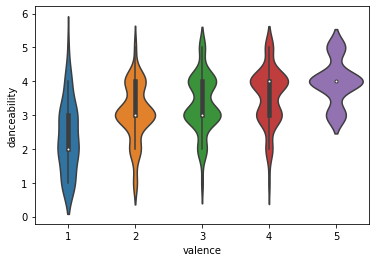

In [95]:
# Plot violin plot for valence and danceability
sns.violinplot(x=df["valence"],y=df["danceability"])

From the violin plot above, we can see that songs with higher valence tend to have a higher danceability than songs with higher valence, implying a positive correlation between valence and danceability. This makes sense as using domain knowledge, happier songs are usually more danceable than sadder songs

<AxesSubplot:xlabel='energy', ylabel='valence'>

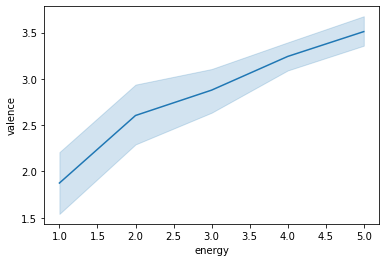

In [96]:
# Plot line plot for energy and valence
sns.lineplot(x="energy", y="valence", data=df)

From the line plot above, we can see that energy and valence have a general positive correlation. This implies that as the energy of the song increases, the valence also increases. This makes sense as using domain knowledge, energetic songs tend to be more happy than less energetic songs, which tend to be more mellow. 

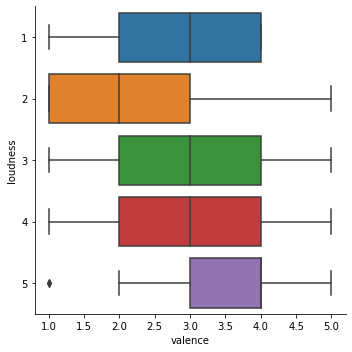

In [97]:
# Plot box plot for valence and loudness
sns.catplot(x="valence",y="loudness",data=df, orient="h", kind="box")

The box plot above shows us that songs with higher valence are generally louder. This implies a positive correlation between valence and loudness, as when valence increases, loudness increases too. This makes sense as using domain knowledge, happier songs tend to be louder than sadder songs.

<AxesSubplot:ylabel='None'>

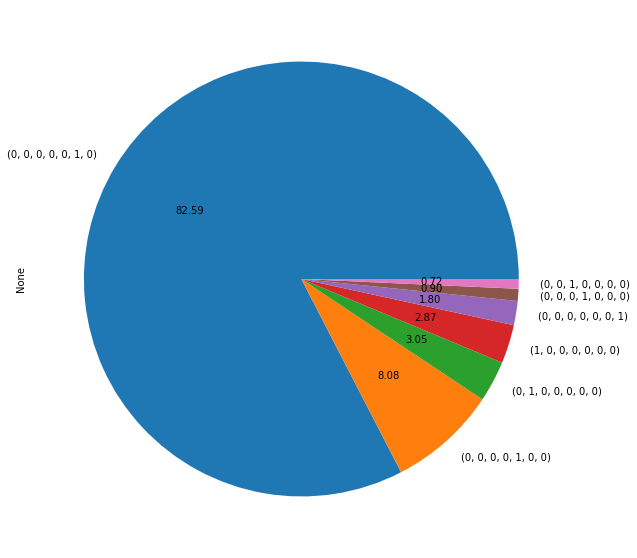

In [98]:
# Plot a pie chart for the differnet genres
df.loc[:, ['top genre_edm', 'top genre_hip hop', 'top genre_house',
       'top genre_latin', 'top genre_others', 'top genre_pop',
       'top genre_room']].value_counts().plot.pie(figsize=(15,10), autopct='%.2f')

(0,0,0,0,0,1,0) refers to pop, which seems to be the most popular genre at 82.59% of genres.
(0,0,0,0,1,0,0) refers to genres that are not edm, hip hop, house, latin, room or pop. "Other" genres seem to be the 2ndmost popular genre at 8.08% of genres.
(0,1,0,0,0,0,0) refers to hip hop, which seems to be the third most popular genre at 3.05% of genres.

In [99]:
df.to_excel(r'C:\Y2 Sem 1\Machine Learning for Developers.xlsx', header=True)

In [100]:
# Import relevant modules
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Shuffle and Split the dataset to predict popularity, splitting the dataset at a 80:20 ratio and having a random state of 8
df = df.to_numpy()
X = df[:, 0:17]
y = df[:, [17]]
size = 0.20
seed = 8           
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=seed)

In [101]:
# Evaluate Algorithms and set their hyperparameters
LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
SVM = SVC(gamma='auto')

In [102]:
# Train the model
LR.fit(X_train,y_train)
LDA.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
SVM.fit(X_train,y_train)

SVC(gamma='auto')

In [103]:
# Evaluate the model
accuracy_score_LR = accuracy_score(y_test,LR.predict(X_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('SVM:',accuracy_score_SVM)

LR: 0.5357142857142857
LDA: 0.5714285714285714
KNN: 0.5178571428571429
CART: 0.3482142857142857
SVM: 0.5446428571428571


In [115]:
# Evaluate the model
accuracy_score_LR_tuned = accuracy_score(y_test,LR_tuned.predict(X_test))
accuracy_score_LDA_tuned = accuracy_score(y_test,LDA_tuned.predict(X_test))
accuracy_score_KNN_tuned  = accuracy_score(y_test,KNN_tuned.predict(X_test))
accuracy_score_CART_tuned = accuracy_score(y_test,CART_tuned.predict(X_test))
accuracy_score_SVM_tuned = accuracy_score(y_test,SVM_tuned.predict(X_test))

print('LR:',accuracy_score_LR_tuned)
print('LDA:',accuracy_score_LDA_tuned)
print('KNN:',accuracy_score_KNN_tuned)
print('CART:',accuracy_score_CART_tuned)
print('SVM:',accuracy_score_SVM_tuned)

LR: 0.5803571428571429
LDA: 0.5803571428571429
KNN: 0.5535714285714286
CART: 0.5446428571428571
SVM: 0.5178571428571429


In [104]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
# define models and parameters
model = LR
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

Best: 0.489037 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [105]:
LR_tuned = LogisticRegression(C=0.01,penalty='l2',solver="newton-cg")

In [106]:
model=LDA
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=8)
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.492
Config: {'shrinkage': 0.39, 'solver': 'lsqr'}


In [107]:
LDA_tuned = LinearDiscriminantAnalysis(shrinkage=0.39,solver="lsqr")

In [108]:
model = KNN
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.490703 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


In [109]:
KNN_tuned = KNeighborsClassifier(metric='manhattan',n_neighbors=17,weights='distance')

In [110]:
model = CART
max_depth= [2, 3, 5, 10, 20]
min_samples_leaf= [5, 10, 20, 50, 100]
criterion= ["gini", "entropy"]
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,criterion=criterion)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.488268 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


In [111]:
CART_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=20)

In [112]:
model = SVM
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.459675 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [113]:
SVM_tuned = SVC(C=50,gamma='scale',kernel='poly')

In [114]:
LR_tuned.fit(X_train,y_train)
LDA_tuned.fit(X_train,y_train)
KNN_tuned.fit(X_train,y_train)
CART_tuned.fit(X_train,y_train)
SVM_tuned.fit(X_train,y_train)

SVC(C=50, kernel='poly')

After evaluating, I concluded that LR is the more appropriate model to use as logistic regression produces robust estimations regardless of assumptions as logistic regression does not make any assumptions about distributions of variables or relationships, unlike linear discriminant analysis, where if the assumptions of LDA are violated, the model would not make as robust estimations. Furthermore, the requirements of multivariate normalities would disrupt LDA’s classifications more than LR, hence I chose to use LR over LDA. 

In [116]:
# Print the confusion matrix and classification report for LDA
print("Confusion matrix:")
print(confusion_matrix(y_test, LR_tuned.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, LR_tuned.predict(X_test)))

Confusion matrix:
[[ 0  0  0  2  0]
 [ 0  0  0  6  0]
 [ 0  0  0 15  2]
 [ 0  0  0 52  6]
 [ 0  0  0 16 13]]
Classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        17
           4       0.57      0.90      0.70        58
           5       0.62      0.45      0.52        29

    accuracy                           0.58       112
   macro avg       0.24      0.27      0.24       112
weighted avg       0.46      0.58      0.50       112



In [117]:
# Test out and predict a song popularity
print(LR_tuned.predict([[2010,1,4,4,5,2,1,1,2,2,0,0,0,0,0,0,1]]))

[4]


In [ ]:
import numpy as np
from flask import Flask, request, render_template
import joblib
joblib.dump(LR_tuned,"predictionModel.pkl")
app = Flask(__name__)
model = joblib.load('predictionModel.pkl')
@app.route('/')
def home():
    return render_template('popularity_predictor.html')

@app.route('/predict',methods=['POST'])
def predict():
    title = "Classify Popularity"
    form_data = [float(x) for x in request.form.values()]
    features = [np.array(form_data)]
    prediction = model.predict(features)

    # Format prediction text for display in "popularity_predictor.html"
    return render_template('popularity_predictor.html', song_prediction='Song popularity should be {}'.format(prediction[0]), title=title)
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Aug/2022 14:26:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Aug/2022 14:26:58] "GET /static/templates/genreValues.js HTTP/1.1" 404 -
127.0.0.1 - - [15/Aug/2022 14:26:58] "GET /static/music-gfd4faec89_1280.png HTTP/1.1" 200 -
127.0.0.1 - - [15/Aug/2022 14:26:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/Aug/2022 15:15:59] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/Aug/2022 15:15:59] "GET /static/templates/genreValues.js HTTP/1.1" 404 -
